In [27]:
#import statistics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [28]:
#read in data
scores = pd.read_csv('/Users/giovannibalestrieri/Desktop/Decision Support Systems/Group Assignement/Statistical tests/Scores.csv', sep=';')

# Hypothesis Testing

## Hypotheses

### H1: Playlist 1 is perceived to be less personalized

- **Null Hypothesis (H0):** There is no significant difference in perceived personalization between Playlist 1 and Playlist 2.
- **Alternative Hypothesis (H1):** Playlist 1 is perceived to be less personalized than Playlist 2.

#### Statistical Test: Paired t-test

1. **Data Preparation:**
   - Organize data with paired scores for Playlist 1 and Playlist 2.

2. **Paired t-test:**
   - Perform a paired t-test on satisfaction scores for Playlist 1 and Playlist 2.
   - **Interpretation:** If p-value < 0.05, reject H0, suggesting a significant difference in perceived personalization.

---

### H2: Playlist 1 produces more novel content than high-level features for a given genre.

- **Null Hypothesis (H0):** There is no significant difference in the novelty of content between Playlist 1 and Playlist 2.
- **Alternative Hypothesis (H2):** Playlist 1 produces more novel content than Playlist 2.

#### Statistical Test: Paired t-test

1. **Data Preparation:**
   - Focus on questions related to the novelty of content for each playlist.

2. **Paired t-test:**
   - Conduct a paired t-test on scores related to content novelty for Playlist 1 and Playlist 2.
   - **Interpretation:** If p-value < 0.05, reject H0, suggesting Playlist 1 produces more novel content.

---

### H3: People with more 'Openness to Experience' will be more satisfied with Playlist 1 than with Playlist 2

- **Null Hypothesis (H0):** 'Openness to Experience' does not moderate the relationship between playlist satisfaction and playlist type.
- **Alternative Hypothesis (H3):** 'Openness to Experience' moderates the relationship, and people with more openness are more satisfied with Playlist 1.

#### Statistical Test: Regression Analysis with Interaction Term

1. **Data Preparation:**
   - Include 'Openness to Experience' scores and satisfaction scores for Playlist 1 and Playlist 2.

2. **Regression Analysis:**
   - Run a regression model with playlist satisfaction as the dependent variable, playlist type, 'Openness to Experience,' and the interaction term.
   - **Interpretation:** If the interaction term is significant, 'Openness to Experience' moderates the relationship.

---

## Score Calculation

- **Openness Score:** Sum of scores for questions 1 to 5.
- **Satisfaction Score:** Sum of scores for questions related to satisfaction.
- **Novelty Score:** Sum of scores for questions related to the novelty of content.
- **Personalization Score:** Sum of scores for questions related to personalization.



In [30]:
#drop column Unnamed: 9
scores = scores.drop(['Unnamed: 9'], axis=1)
scores

,Openness,Satisfaction_1,Novelty_1,Personalization_1,Exploration_1,Satisfaction_2,Novelty_2,Personalization_2,Exploration_2
0,4.4,1.0,5,1.0,1,1.0,3,1.0,1
1,4.6,3.5,5,3.5,3,2.0,5,2.0,3
2,5.0,1.0,1,1.0,1,1.0,5,1.0,1
3,3.8,2.0,5,1.5,2,2.5,4,2.0,3
4,3.0,3.0,5,3.0,2,2.5,5,2.5,4
5,4.4,3.5,4,1.5,5,2.0,3,2.5,2
6,4.6,2.0,4,1.5,2,1.5,4,1.5,1
7,3.8,2.0,5,1.5,2,2.0,5,2.0,2
8,4.2,4.0,5,3.0,5,2.0,5,1.5,3
9,4.4,3.5,5,2.5,4,4.0,5,3.5,4


Highlights:

Positive correlation between openness and Exploration_1 and Negative Correlation between Openness and Exploraiton_2 

Positive Correlation Between Novelty_1 and Exploration_1 and negative correlation between Novelty_2 and Exploraiton_2

high Positive correlation between Personalization_2 and Satifaciton_2 and Exploraiton_2

high Correlation between Satisfaciton_2 and Personalizaiton_2

---

Hypothesis: playlist 1 is perceived to be less personalized 

The null hypothesis (H0) would be that there is no significant difference in perceived personalization between the two playlists.

In [37]:
#Perform a paired t-test to compare the mean satisfaction scores for Playlist 1 and Playlist 2, the scores are Personalization_1 and Personalization_2 respectively.
#H0: The mean satisfaction scores for Playlist 1 and Playlist 2 are equal
#H1: The mean satisfaction scores for Playlist 1 and Playlist 2 are not equal

import scipy.stats as stats

# Assuming your data is in a pandas DataFrame named 'scores'
# and columns are named 'Personalization_1' and 'Personalization_2'

# Extract the relevant columns
playlist_1_personalization = scores['Personalization_1']
playlist_2_personalization = scores['Personalization_2']

# Calculate the mean of the scores for each playlist
mean_personalization_1 = round(playlist_1_personalization.mean(), 2)
mean_personalization_2 = round(playlist_2_personalization.mean(), 2)

# Print the structured output
print(f"Mean Personalization Score for Playlist 1: {mean_personalization_1}")
print(f"Mean Personalization Score for Playlist 2: {mean_personalization_2}")

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(playlist_1_personalization, playlist_2_personalization)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in perceived personalization between Playlist 1 and Playlist 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in perceived personalization between Playlist 1 and Playlist 2.")



Mean Personalization Score for Playlist 1: 2.18
Mean Personalization Score for Playlist 2: 2.21
T-statistic: -0.16792726449424644
P-value: 0.8692248160918236
Fail to reject the null hypothesis. There is no significant difference in perceived personalization between Playlist 1 and Playlist 2.


---

Hypothesis: Playlist 1 produces more novel playlist in terms of content

The null hypothesis (H0) would be that there is no significant difference in the novelty of content between the two playlists.

In [38]:
playlist_1_novelty = scores['Novelty_1']
playlist_2_novelty = scores['Novelty_2']

# Calculate the mean of the scores for each playlist
mean_playlist_1 = round(playlist_1_novelty.mean(), 2)
mean_playlist_2 = round(playlist_2_novelty.mean(), 2)

# Print the structured output
print(f"Mean Novelty Score for Playlist 1: {mean_playlist_1}")
print(f"Mean Novelty Score for Playlist 2: {mean_playlist_2}")

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(playlist_1_novelty, playlist_2_novelty)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Playlist 1 produces more novel content than Playlist 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in novelty between Playlist 1 and Playlist 2.")

Mean Novelty Score for Playlist 1: 4.36
Mean Novelty Score for Playlist 2: 4.14
T-statistic: 0.5630925063714729
P-value: 0.5829538031976736
Fail to reject the null hypothesis. There is no significant difference in novelty between Playlist 1 and Playlist 2.


Also the mean of novelty Score for Playlist 1 is, yet by little, lower than the mean of novelty Score for Playlist 2. And this would go against our hypothesis.

---

---

Hypothesis: People with more 'Openness to Experience' will be more satisfied with Playlist 1 than with Playlist 2

playlist satisfaction is the dependent variable, playlist type is a categorical independent variable, 'Openness to Experience' is a continuous independent variable, and the interaction term between playlist type and 'Openness to Experience' should suggest that the effect of 'Openness' on satisfaction differs between Playlist 1 and Playlist 2.

main result: The relationship between playlist satisfaction and playlist type is not moderated by 'Openness to Experience'. In other words, the effect of 'Openness to Experience' on playlist satisfaction is the same for both Playlist 1 and Playlist 2.



In [39]:
#make a new dataframe with the the Openness and Satisfaction_1 columns only and add a column named Playlist valued as 1
df_1 = scores[['Openness', 'Satisfaction_1']]
df_1['Playlist'] = 1
#rename the column Satisfaction_1 as Satisfaction
df_1 = df_1.rename(columns={'Satisfaction_1': 'Satisfaction'})

#make a new dataframe with the the Openness and Satisfaction_2 columns only and add a column named Playlist valued as 2
df_2 = scores[['Openness', 'Satisfaction_2']]
df_2['Playlist'] = 2
#rename the column Satisfaction_2 as Satisfaction
df_2 = df_2.rename(columns={'Satisfaction_2': 'Satisfaction'})

#append the two dataframes
df = df_1.append(df_2)

import statsmodels.api as sm
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df'
# and columns are named 'Openness', 'Satisfaction', and 'Playlist'

# Create a new DataFrame for regression analysis
regression_data = pd.DataFrame({
    'Openness': df['Openness'],
    'Satisfaction': df['Satisfaction'],
    'Playlist': df['Playlist']
})

# Add a column for playlist type (1 for Playlist 1, 0 for Playlist 2)
regression_data['Playlist_Type'] = pd.get_dummies(regression_data['Playlist'], drop_first=True)

# Create an interaction term
regression_data['Interaction_Term'] = regression_data['Openness'] * regression_data['Playlist_Type']

# Run the regression model
X = regression_data[['Openness', 'Playlist_Type', 'Interaction_Term']]
y = regression_data['Satisfaction']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.7012
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.561
Time:                        11:03:25   Log-Likelihood:                -39.532
No. Observations:                  28   AIC:                             87.06
Df Residuals:                      24   BIC:                             92.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.3379      2.389  

/var/folders/mg/667_zj95427b86bx_17bsgl40000gn/T/ipykernel_1062/394535980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Playlist'] = 1
/var/folders/mg/667_zj95427b86bx_17bsgl40000gn/T/ipykernel_1062/394535980.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Playlist'] = 2
/var/folders/mg/667_zj95427b86bx_17bsgl40000gn/T/ipykernel_1062/394535980.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

# Regression Analysis Results

## Openness to Experience and Playlist Satisfaction

### Openness to Experience (Coefficient: -0.3820, P-value: 0.510)

The negative coefficient suggests that as 'Openness to Experience' increases, there is a slight decrease in playlist satisfaction. This could be because more open individuals are harder to satisfy, possibly characterized by absorbing heterogeneous conceptions about music, leading to more sophisticated and nuanced preferences. However, this coefficient is not statistically significant. Therefore, we do not have enough evidence to conclude that 'Openness to Experience' has a significant effect on playlist satisfaction.

### Playlist Type (Coefficient: 0.4935, P-value: 0.885)

The positive coefficient for 'Playlist Type' suggests that Playlist 1 tends to have higher satisfaction compared to Playlist 2 (the reference level). This might indicate that people appreciate a more representative playlist, as Playlist 1 generates songs closer to the genre space. However, the coefficient is not statistically significant. Therefore, we do not have enough evidence to conclude that there is a significant difference in satisfaction between Playlist 1 and Playlist 2.

### Interaction Term (Coefficient: -0.1960, P-value: 0.810)

If the interaction term has a negative coefficient, it suggests that the relationship between 'Openness to Experience' and playlist satisfaction is slightly weaker for Playlist 1 compared to Playlist 2. Although this effect is not statistically significant given the p-value, there is no strong evidence to reject the null hypothesis. The null hypothesis states that the relationship between playlist satisfaction and 'Openness to Experience' is the same for both Playlist 1 and Playlist 2. Therefore, there is no significant moderation effect, and the effect of 'Openness to Experience' on satisfaction does not differ significantly between the playlists.


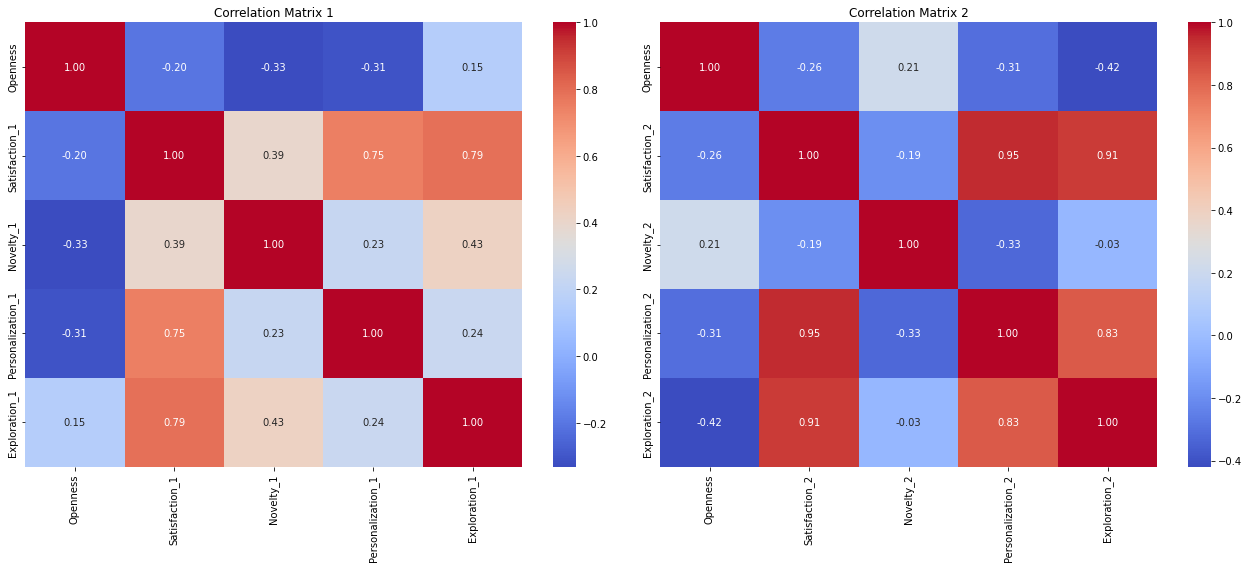

In [34]:

#create a new dataframe called scores_for_corr_1 with only the columns Openness, Satisfaction_1, Novelty_1, Personalization_1, Exploration_1
scores_for_corr_1 = scores[['Openness', 'Satisfaction_1', 'Novelty_1', 'Personalization_1', 'Exploration_1']]

#create a new dataframe called scores_for_corr_2 with only the columns Openness, Satisfaction_2, Novelty_2, Personalization_2, Exploration_2
scores_for_corr_2 = scores[['Openness', 'Satisfaction_2', 'Novelty_2', 'Personalization_2', 'Exploration_2']]

corr1 = scores_for_corr_1.corr()
corr2 = scores_for_corr_2.corr()

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the first correlation matrix
sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix 1')

# Plot the second correlation matrix
sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix 2')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



Novelty does not correlate strongly with neither satisfaction and personalization in both objective and subjective cases. 
Novelty correlates positively with satisfaciotn in the objective case and negatively in the subjective case.
While there is a high correlation between personalization and satisfaciton. 

In [41]:
#write me an OLS with Eploraiton 1 as dependent variable and Openness, Satisfaciton_1, Novelty_1, and Personalization_1 as independent variables
model = ols('Exploration_1 ~ Openness + Novelty_1 + Personalization_1', data=scores).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exploration_1   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.656
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.239
Time:                        11:37:08   Log-Likelihood:                -21.471
No. Observations:                  14   AIC:                             50.94
Df Residuals:                      10   BIC:                             53.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.2165      4.16

/Users/giovannibalestrieri/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
#write me an OLS with Eploraiton 1 as dependent variable and Openness, Satisfaciton_1, Novelty_1, and Personalization_1 as independent variables
model = ols('Exploration_2 ~ Openness + Novelty_2 + Personalization_2', data=scores).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exploration_2   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     13.72
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           0.000707
Time:                        11:37:14   Log-Likelihood:                -11.717
No. Observations:                  14   AIC:                             31.43
Df Residuals:                      10   BIC:                             33.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1355      1.83

/Users/giovannibalestrieri/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Openness: is intresting how openness, even though not a significant factor in the genre explporaiton percieved helpullness in the case of both objective and subjective features, has a positive coefficient for exploraiton based on objective features and a negative coeffifient for subjective features.

Novelty: it seem to enhance genre exploration in both cases, but we cannot state it with statistical significance at the current state of art given both p-vlues higher than 0.05

Personalization: in the playlist generated from objective features we see no significant impact on percieved helpullness, while in the case of subjective features playlists we see a highly significant positive impact of percieved helfullness.